In [39]:
# import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 1)

FlannBasedMatcher with FLANN_INDEX_KDTREE

In [40]:
def shake_detector(img1, img2, matcher, flag=False):
    
    # Create the SIFT detector object
    sift = cv2.SIFT_create()
    
    # make a copy of images
    image1 = img1.copy()
    image2 = img2.copy()

    # Extract keypoints and descriptors of images
    kp1, descr1 = sift.detectAndCompute(image1,None)
    kp2, descr2 = sift.detectAndCompute(image2,None)

    # Check ‫‪the algorithm
    if matcher == 'flann':
        # FLANN parameters
        FLANN_INDEX_KDTREE = 1
        
        # Specify the algorithm and the number of trees
        index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
        
        # Specify the number of iterations
        search_params = dict()
    
        # Feed both parameters to FlannBasedMatcher
        object = cv2.FlannBasedMatcher(index_params,search_params)
    elif matcher == 'bfm':
        
        # create BFMatcher object
        object = cv2.BFMatcher()  

    # Define knnMatch with k=2
    matches = object.knnMatch(descr1, descr2, k=2)

    check_move = 0
    good_matches = []
    flag_shake = False
    for (m,n) in matches:
        if min(m.distance,n.distance) <= 5:
            check_move +=1
            good_matches.append([m])
            
    # Check shaking
    if check_move >= 1:
        flag_shake = True

    if flag:
        # Connect selected points
        corresponding_image = cv2.drawMatchesKnn(
            image1, kp1, image2, kp2, good_matches, None, 
            flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
        plt.figure(figsize=(18,9))
        plt.imshow(corresponding_image)
        plt.axis('off')
        plt.show()
        
    return check_move, flag_shake

In [41]:
# Load first images and apply shake_detector
image1 = cv2.imread('1/000001.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('1/000002.jpg', cv2.IMREAD_GRAYSCALE)

check_move, flag_shake = shake_detector(image1, image2, matcher='flann')
print('- First Folder images')
print('Number of close points(less than 5):', check_move)
print('No camera shaking:', flag_shake)
print('--------------------------------------------')


# Load second images and apply shake_detector
image1 = cv2.imread('2/000001.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('2/000002.jpg', cv2.IMREAD_GRAYSCALE)

check_move, flag_shake = shake_detector(image1, image2, matcher='flann')
print('- Second Folder images')
print('Number of close points(less than 5):', check_move)
print('No camera shaking:', flag_shake) 
print('--------------------------------------------')


# Load Third images and apply shake_detector
image1 = cv2.imread('3/000001.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('3/000002.jpg', cv2.IMREAD_GRAYSCALE)

check_move, flag_shake = shake_detector(image1, image2, matcher='flann')
print('- Third Folder images')
print('Number of close points(less than 5):',check_move)
print('No camera shaking:', flag_shake) 
print('--------------------------------------------')


# Load Forth images and apply shake_detector
image1 = cv2.imread('4/000001.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('4/000002.jpg', cv2.IMREAD_GRAYSCALE)

check_move, flag_shake = shake_detector(image1, image2, matcher='flann')
print('- Forth Folder images')
print("Number of close points(less than 5):",check_move)
print("The flag of no camera shaking is:", flag_shake) 
print('--------------------------------------------')

- First Folder images
Number of close points(less than 5): 135
No camera shaking: True
--------------------------------------------
- Second Folder images
Number of close points(less than 5): 0
No camera shaking: False
--------------------------------------------
- Third Folder images
Number of close points(less than 5): 4
No camera shaking: True
--------------------------------------------
- Forth Folder images
Number of close points(less than 5): 0
The flag of no camera shaking is: False
--------------------------------------------


### 2)

BFMatcher

In [42]:
# Load first images and apply shake_detector
image1 = cv2.imread('1/000001.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('1/000002.jpg', cv2.IMREAD_GRAYSCALE)

check_move, flag_shake = shake_detector(image1, image2, matcher='bfm')
print('- First Folder images')
print('Number of close points(less than 5):', check_move)
print('No camera shaking:', flag_shake)
print('--------------------------------------------')


# Load second images and apply shake_detector
image1 = cv2.imread('2/000001.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('2/000002.jpg', cv2.IMREAD_GRAYSCALE)

check_move, flag_shake = shake_detector(image1, image2, matcher='bfm')
print('- Second Folder images')
print('Number of close points(less than 5):', check_move)
print('No camera shaking:', flag_shake) 
print('--------------------------------------------')


# Load Third images and apply shake_detector
image1 = cv2.imread('3/000001.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('3/000002.jpg', cv2.IMREAD_GRAYSCALE)

check_move, flag_shake = shake_detector(image1, image2, matcher='bfm')
print('- Third Folder images')
print('Number of close points(less than 5):', check_move)
print('No camera shaking:', flag_shake) 
print('--------------------------------------------')


# Load Forth images and apply shake_detector
image1 = cv2.imread('4/000001.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('4/000002.jpg', cv2.IMREAD_GRAYSCALE)

check_move, flag_shake = shake_detector(image1, image2, matcher='bfm')
print('- Forth Folder images')
print("Number of close points(less than 5):", check_move)
print("The flag of no camera shaking is:", flag_shake) 
print('--------------------------------------------')

- First Folder images
Number of close points(less than 5): 135
No camera shaking: True
--------------------------------------------
- Second Folder images
Number of close points(less than 5): 0
No camera shaking: False
--------------------------------------------
- Third Folder images
Number of close points(less than 5): 4
No camera shaking: True
--------------------------------------------
- Forth Folder images
Number of close points(less than 5): 0
The flag of no camera shaking is: False
--------------------------------------------


### 3)

According to the runtimes BFMatcher is slower than FlannBasedMatcher, because FlannBasedMatcher uses the the KD_tree algorithm that has log order log(n), but BFMatcher uses exhaustive search to find nearest neighbors with order of n. 

### 4)

No. As we saw in the class, STFT is scale invariant.

### 5)

FlannBasedMatcher

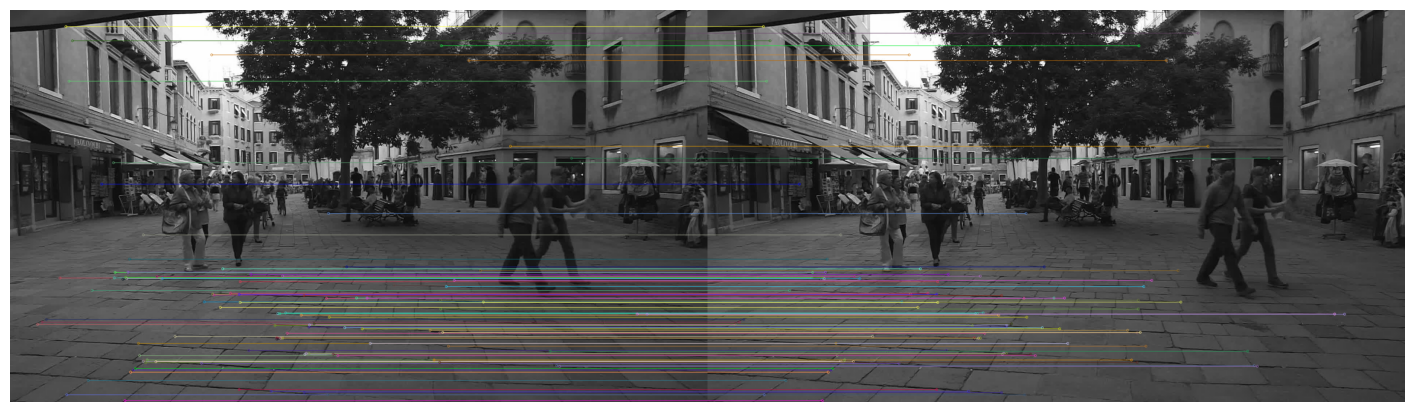

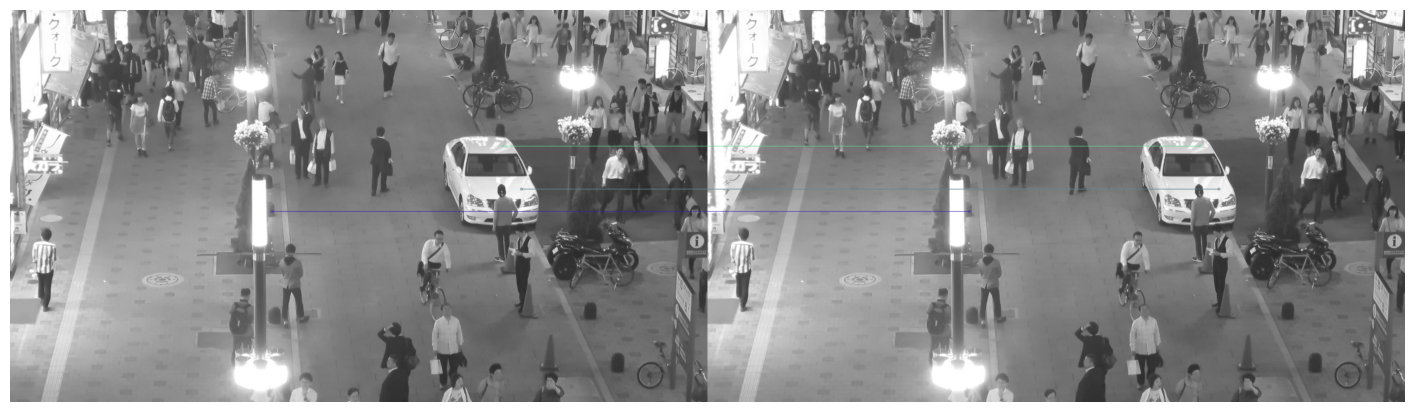

(4, True)

In [43]:
# First folder images
image1 = cv2.imread('1/000001.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('1/000002.jpg', cv2.IMREAD_GRAYSCALE)
shake_detector(image1, image2, matcher='flann', flag=True)

# Third folder images
image1 = cv2.imread('3/000001.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('3/000002.jpg', cv2.IMREAD_GRAYSCALE)
shake_detector(image1, image2, matcher='flann', flag=True)

The points are edges or blobs in both frames, this is the common feature between tnem.
In video stabilization Edge points or Corners are useful.
In video stabilization a set of SIFT points are tracked across the frames.
Motion and camera shaking can be estimated by comparing the positions of SIFT points in two frames.